# Máquinas de Soporte Vectorial

In [221]:
import pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

from sklearn.svm import SVC
from sklearn import svm

In [222]:
mva = pd.read_csv("andSVM.csv")
#print(mv)

mv = pd.DataFrame(mva,columns=['X1','X2','y'])

x1 = mv.iloc[:,0]
x2 = mv.iloc[:,1]
y = mv.iloc[:,2]

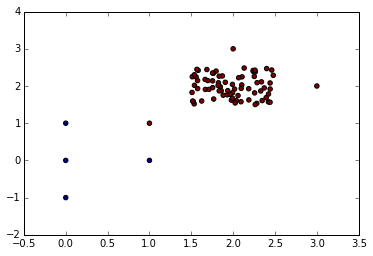

In [223]:
plt.scatter(x1,x2,c=y)
plt.show()

In [224]:
mod = svm.SVC(kernel='linear',C=20.0)

In [225]:
mod.fit(mv[['X1','X2']],mv['y'])

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [226]:
w0=mod.intercept_
w1=mod.coef_[0,0]
w2=mod.coef_[0,1]
print(w0)
print(w1)
print(w2)

[-3.]
2.0
2.0


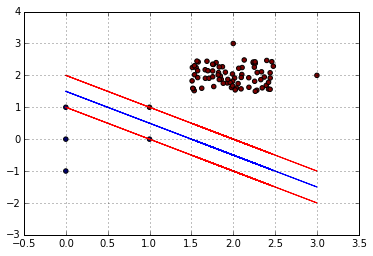

In [227]:
p=(w0/w2)
p2=(w1/w2)
plt.scatter(mv.X1,mv.X2,c=y)
x=np.linspace(-1,3,258)
plt.plot(mv.X1,-mv.X1*p2-p,color='blue')
plt.plot(mv.X1,((-mv.X1*p2-p)+.5),color='red')
plt.plot(mv.X1,((-mv.X1*p2-p)-.5),color='red')
plt.grid()
plt.show()

# Círculo con Maq de Soporte Vectorial


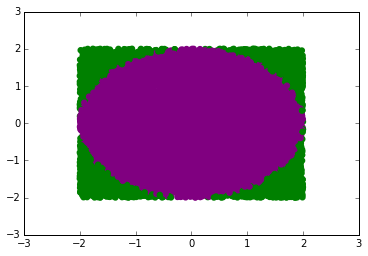

In [228]:
num=10000
R = 2

x1 = []
x2 = []
y = []

random.seed(10)
x1 = np.random.uniform(-R,R,num)
x2 = np.random.uniform(-R,R,num)
#print(x1,x2)
y = []
for i in range(len(x1)):
    if (((x1[i]**2)+(x2[i]**2)) < R**2):
        y1 = 1
    else:
        y1 = 0
    y.append(y1)
    
XY = []

for k in range (len(x1)):
    XY.append([x1[k],x2[k],y[k]])
    
XY = pd.DataFrame(XY,columns=['x1','x2','y'])
y_test = zip(y)
#print XY
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
pltreal.scatter(x1,x2,color=['purple' if i[0]==1 else 'green' for i in y_test],linewidths=2)
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(XY[['x1','x2']], XY[['y']], train_size=0.75)

In [229]:
mod = svm.SVC(kernel='rbf',gamma=1)

In [230]:
XY = pd.DataFrame(XY,columns=['x1','x2','y'])

In [231]:
#mod.fit(XY[['x1','x2']],XY['y'])
mod.fit(X_train,Y_train)

C:\Users\Denisse\Anaconda\lib\site-packages\sklearn\svm\base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=1,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [232]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 100),np.linspace(-2, 2, 100))
#print(xx)
#print(yy)

In [233]:
Z = mod.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#print(Z)

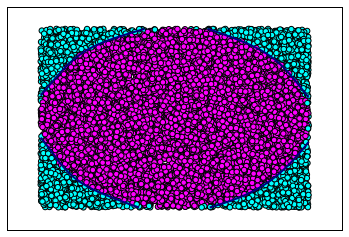

In [234]:
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,linetypes='--')
plt.scatter(XY['x1'], XY['x2'], s=30, c=XY['y'], cmap=plt.cm.cool)
#plt.scatter(X_train[0],X_train[1], s=30, c=Y_train[0], cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.show()

#Curva ROC & Matriz de confusión

In [235]:
#res = []
#for i in range(len(X_test)):
#    r = mod.predict(X_test.iloc[i,:])
#    res.append(r)
#res

res1 = mod.decision_function(zip(X_test.iloc[:,0],X_test.iloc[:,1]))
#res1

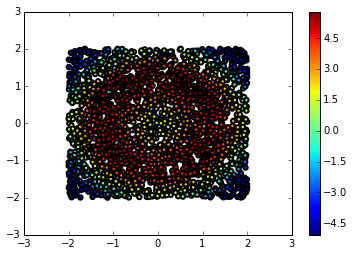

In [236]:
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
a= pltreal.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=res1,linewidths=2)
plt.colorbar(a)
plt.plot
plt.show()

In [237]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,umbrales = roc_curve(Y_test.iloc[:,0],res1)
#print(fpr)
#print(tpr)
#print(umbrales)
print(auc(fpr,tpr))

0.999288146624


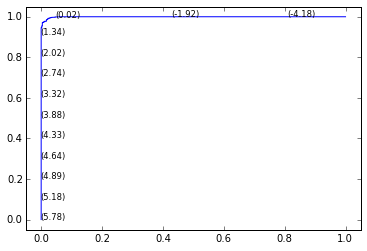

In [238]:
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
plt.plot(fpr,tpr)
plt.axis([-0.05,1.05,-0.05,1.05])
for x in range(0,len(Y_test),200):
    a = round(umbrales[x],2)
    b = [fpr[x],tpr[x]]
    pltreal.annotate('(%s)' % a,xy=b,size='small')  
plt.show()

In [239]:
umbral = 0

y_predict = []

for i in range(len(res1)):
    if res1[i] > umbral:
        y_predict.append(1)
    else:
        y_predict.append(0)
         
#y_predict

<function matplotlib.pyplot.plot>

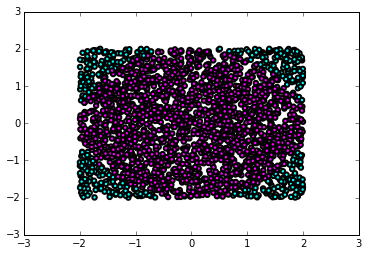

In [240]:
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
pltreal.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_predict,cmap=plt.cm.cool,linewidths=2)
plt.plot

In [241]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test.iloc[:,0],y_predict,labels=[0,1])

array([[ 496,   26],
       [   1, 1977]])

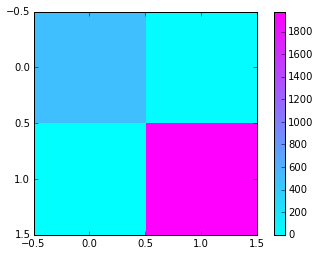

In [242]:
plt.imshow(confusion_matrix(Y_test.iloc[:,0],y_predict,labels=[0,1]),interpolation='nearest',cmap=plt.cm.cool)
plt.colorbar()
plt.show()